env urban

csf3 junjie

## feature importance for thermal, radiative, morphological

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_csv("./data/feature_importance_shap.csv")
df_plot_tmp = df.set_index(["features","category"]).stack().reset_index()
df_plot_tmp.columns = ["features","category","model_year","ranking score"]

# split model_year
new = df_plot_tmp["model_year"].str.split("_", expand=True)
df_plot_tmp["model"] = new[0]
df_plot_tmp["year"] = new[1]
df_plot_tmp = df_plot_tmp[df_plot_tmp["model"]!="lgbm"]

df_plot = df_plot_tmp[["features","category","ranking score","model","year"]]

In [2]:
df_plot_tmp.model.unique()

array(['FLAML', 'xgboost'], dtype=object)

In [3]:
df_plot

,features,category,ranking score,model,year
0,FLNS,cam,32.0,FLAML,2006
1,FLNS,cam,32.0,xgboost,2006
2,FLNS,cam,33.0,FLAML,2061
3,FLNS,cam,34.0,xgboost,2061
4,FSNS,cam,35.0,FLAML,2006
...,...,...,...,...,...
139,lat,loc,32.0,xgboost,2061
140,lon,loc,30.0,FLAML,2006
141,lon,loc,31.0,xgboost,2006
142,lon,loc,30.0,FLAML,2061


In [6]:
df = pd.read_csv("./data/feature_importance_shap.csv")
df

,features,FLAML_2006,xgboost_2006,FLAML_2061,xgboost_2061,category
0,FLNS,32.0,32.0,33.0,34.0,cam
1,FSNS,35.0,35.0,35.0,35.0,cam
2,PRECT,28.0,29.0,29.0,30.0,cam
3,PRSN,33.0,33.0,32.0,25.0,cam
4,QBOT,34.0,34.0,34.0,33.0,cam
5,TREFHT,36.0,36.0,36.0,36.0,cam
6,UBOT,27.0,27.0,27.0,28.0,cam
7,VBOT,26.0,26.0,26.0,27.0,cam
8,CANYON_HWR,24.0,24.0,25.0,24.0,morphological
9,EM_IMPROAD,5.0,5.0,5.0,7.0,radiative


In [7]:
import pandas as pd
df = pd.read_csv("./data/feature_importance.csv")
df_plot_tmp = df.set_index(["features","category"]).stack().reset_index()
df_plot_tmp.columns = ["features","category","model_year","ranking score"]

# split model_year
new = df_plot_tmp["model_year"].str.split("_", expand=True)
df_plot_tmp["model"] = new[0]
df_plot_tmp["year"] = new[1]
df_plot_tmp = df_plot_tmp[df_plot_tmp["model"]!="lgbm"]

df_plot = df_plot_tmp[["features","category","ranking score","model","year"]]

df_plot

,features,category,ranking score,model,year
0,FLNS,cam,31.0,FLAML,2006
1,FLNS,cam,32.0,FLAML,2061
4,FLNS,cam,32.0,xgboost,2006
5,FLNS,cam,32.0,xgboost,2061
6,FSNS,cam,32.0,FLAML,2006
...,...,...,...,...,...
205,lat,loc,25.0,xgboost,2061
206,lon,loc,27.0,FLAML,2006
207,lon,loc,28.0,FLAML,2061
210,lon,loc,26.0,xgboost,2006


In [8]:
df = pd.read_csv("./data/feature_importance_permutation.csv")
df_plot_tmp = df.set_index(["features","category"]).stack().reset_index()
df_plot_tmp.columns = ["features","category","model_year","ranking score"]

# split model_year
new = df_plot_tmp["model_year"].str.split("_", expand=True)
df_plot_tmp["model"] = new[0]
df_plot_tmp["year"] = new[1]
df_plot_tmp = df_plot_tmp[df_plot_tmp["model"]!="lgbm"]

df_plot2 = df_plot_tmp[["features","category","ranking score","model","year"]]

df_plot2 = df_plot2.merge(df_plot, on = ["features","category","model","year"], how = "inner", suffixes=("_permutation",""))

df = pd.read_csv("./data/feature_importance_shap.csv")
df_plot_tmp = df.set_index(["features","category"]).stack().reset_index()
df_plot_tmp.columns = ["features","category","model_year","ranking score"]

# split model_year
new = df_plot_tmp["model_year"].str.split("_", expand=True)
df_plot_tmp["model"] = new[0]
df_plot_tmp["year"] = new[1]
df_plot_tmp = df_plot_tmp[df_plot_tmp["model"]!="lgbm"]

df_plot3 = df_plot_tmp[["features","category","ranking score","model","year"]]
df_plot3 = df_plot3.merge(df_plot2, on = ["features","category","model","year"], how = "inner", suffixes=("_shap",""))

In [9]:
df_plot3['ranking score_shap'] = df_plot3['ranking score_shap'] + df_plot3['ranking score_permutation'] + df_plot3['ranking score']
df_plot3['ranking score_permutation'] = df_plot3['ranking score_permutation'] + df_plot3['ranking score']

In [10]:
df_plot3

,features,category,ranking score_shap,model,year,ranking score_permutation,ranking score
0,FLNS,cam,97.0,FLAML,2006,65.0,31.0
1,FLNS,cam,98.0,xgboost,2006,66.0,32.0
2,FLNS,cam,99.0,FLAML,2061,66.0,32.0
3,FLNS,cam,100.0,xgboost,2061,66.0,32.0
4,FSNS,cam,100.0,FLAML,2006,65.0,32.0
...,...,...,...,...,...,...,...
135,lat,loc,88.0,xgboost,2061,56.0,25.0
136,lon,loc,88.0,FLAML,2006,58.0,27.0
137,lon,loc,88.0,xgboost,2006,57.0,26.0
138,lon,loc,89.0,FLAML,2061,59.0,28.0


In [11]:
df_plot_tmp = df_plot3[['features','category','model','year','ranking score']]
df_plot_tmp['method'] = "Tree-based"
_df = df_plot3[['features','category','model','year','ranking score_permutation']].rename(columns={"ranking score_permutation":"ranking score"})
_df['method'] = "Permutation"
df_plot_tmp = pd.concat([df_plot_tmp, _df])
_df = df_plot3[['features','category','model','year','ranking score_shap']].rename(columns={"ranking score_shap":"ranking score"})
_df['method'] = "SHAP"
df_plot_tmp = pd.concat([df_plot_tmp, _df])
df_plot_tmp

/var/folders/0r/sbwms16j3z5c45znn0hsvrl80000gp/T/ipykernel_55613/3033739244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_tmp['method'] = "Tree-based"


,features,category,model,year,ranking score,method
0,FLNS,cam,FLAML,2006,31.0,Tree-based
1,FLNS,cam,xgboost,2006,32.0,Tree-based
2,FLNS,cam,FLAML,2061,32.0,Tree-based
3,FLNS,cam,xgboost,2061,32.0,Tree-based
4,FSNS,cam,FLAML,2006,32.0,Tree-based
...,...,...,...,...,...,...
135,lat,loc,xgboost,2061,88.0,SHAP
136,lon,loc,FLAML,2006,88.0,SHAP
137,lon,loc,xgboost,2006,88.0,SHAP
138,lon,loc,FLAML,2061,89.0,SHAP


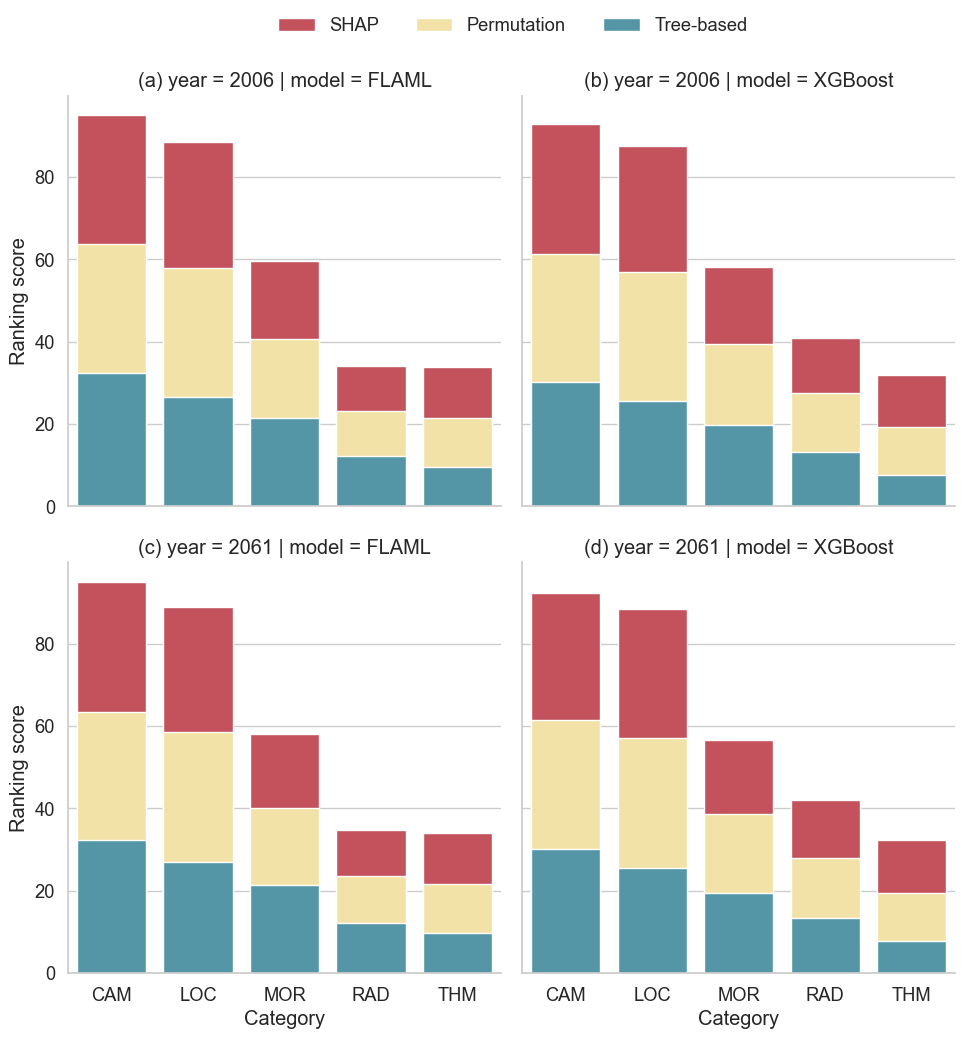

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,5)}, font_scale=1.2, style="whitegrid")

colors = ["#D63F4E","#FEE99A","#469EB4",]

df_plot_tmp.replace({"loc":"LOC", "cam":"CAM", "morphological":"MOR", "radiative":"RAD", "thermal":"THM"}, inplace=True)
df_plot_tmp = df_plot_tmp.replace({"xgboost":"XGBoost"})
df_plot_tmp = df_plot_tmp.sort_values(by=["category"], ascending=True)
g = sns.catplot(x = "category", y = "ranking score", row='year', hue="method", col = 'model', kind="bar", errorbar=None,
                dodge=False, hue_order=["SHAP","Permutation","Tree-based",],
                palette=colors,
                data=df_plot_tmp)
g.set_xlabels("Category")
g.set_ylabels("Ranking score")
titles = ['a', 'b', 'c', 'd']  
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(f"({title}) {ax.get_title()}") 
g.legend.set_visible(False)
#g.legend.set(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncols=0, title="", visible=True)
fig = g.fig
handles, labels = g.axes[0, 0].get_legend_handles_labels()
handles = handles[:3]
labels = labels[:3]
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.45, 1.05), ncol=3, title="", frameon=False)
g.tight_layout()
g.savefig('./paper_figs/all_importance_total_5.pdf', dpi=188)

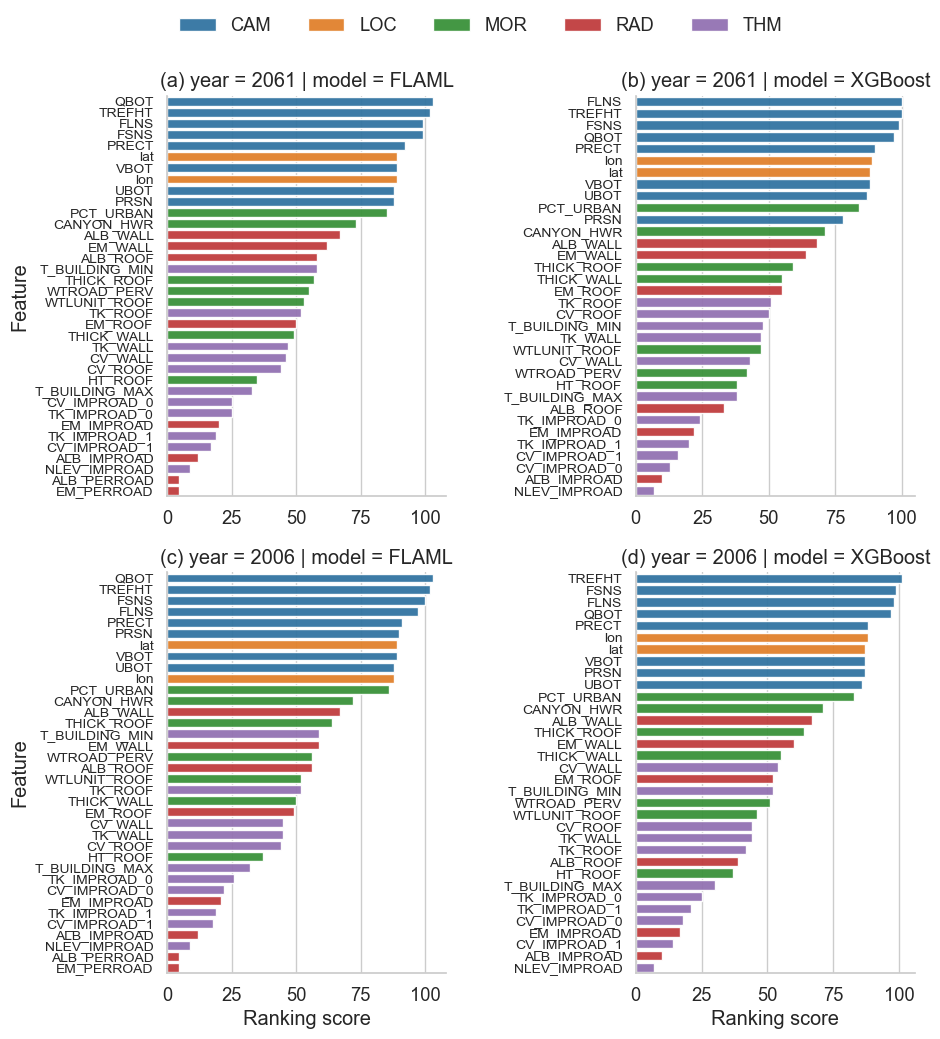

In [13]:
df_plot_ = df_plot_tmp[(df_plot_tmp["ranking score"]>=0) & (df_plot_tmp['method']=='SHAP')].sort_values(by=["ranking score"], ascending=False)

sns.set(rc={'figure.figsize':(12,5)}, style="whitegrid", font_scale=1.2)
g = sns.catplot(y = "features", x = "ranking score", col = 'model', kind="bar", orient="h",
            hue="category",
            sharex=False, sharey=False, legend_out=True,
            row="year", data=df_plot_, palette="tab10",alpha=.95,
            dodge=False)
g.set_yticklabels(fontsize=10)
titles = ['a', 'b', 'c', 'd']  
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(f"({title}) {ax.get_title()}") 
g.set_xlabels("Ranking score")
g.set_ylabels("Feature")  
g.legend.set_visible(False)
#g.legend.set(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncols=0, title="", visible=True)
fig = g.fig
handles, labels = g.axes[0, 0].get_legend_handles_labels()
handles = handles[:5]
labels = labels[:5]
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5, title="", frameon=False)
g.savefig('./paper_figs/all_importance_all.pdf', dpi=188)